In [ ]:
pip install biosignalsnotebooks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 44.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.4 MB/s eta 0:00:00
  Created wheel for libmagic: filename=libmagic-1.0-py3-none-any.whl size=4269 sha256=2045bb3299509c4bf0481597bded4f2c9073bfda283274f2d29a33624108d91f
  Stored in directory: /root/.cache/pip/wheels/31/ce/d8/099fbd4dbfa5da5596a39eee8a17d2e1bcc29006c07d3563b7
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=c5b302c2327ad666

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import pywt
from scipy import signal
from scipy.signal import firwin, lfilter, welch
import biosignalsnotebooks as bsnb

## Obtenemos las señales sin filtrar


In [ ]:
arrayeeg = np.genfromtxt("eegSignal.txt", delimiter="\t",skip_header = 3, missing_values= 0)
#Extraemos la columna de la señal y creamos sus respectivos vectores tiempos
signaleeg = arrayeeg[:, 5]
signaleeg_3000 = signaleeg[0:3000]
Fs_eeg = 1000
Ts_eeg = 1/Fs_eeg
n_eeg= len(signaleeg)
t_eeg = np.arange(0,n_eeg*Ts_eeg,Ts_eeg)
t_eeg_3000 = np.arange(0,3000*Ts_eeg,Ts_eeg)
t_eeg

array([0.00000e+00, 1.00000e-03, 2.00000e-03, ..., 2.60547e+02,
       2.60548e+02, 2.60549e+02])

## Ploteamos las señales sin filtrar




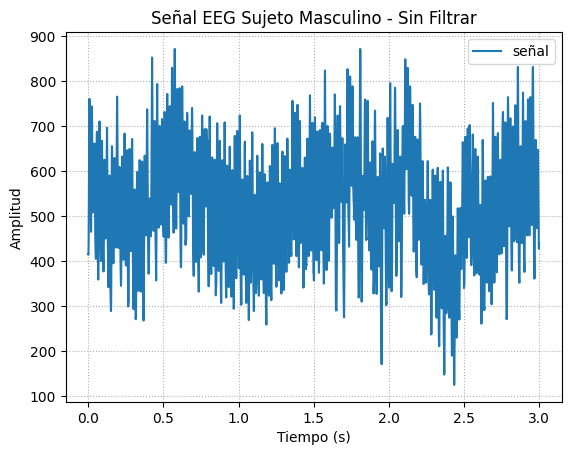

In [ ]:
plt.plot(t_eeg_3000, signaleeg_3000, label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.title("Señal EEG Sujeto Masculino - Sin Filtrar")
plt.show()

## Aplicamos el filtrado con Wavelet





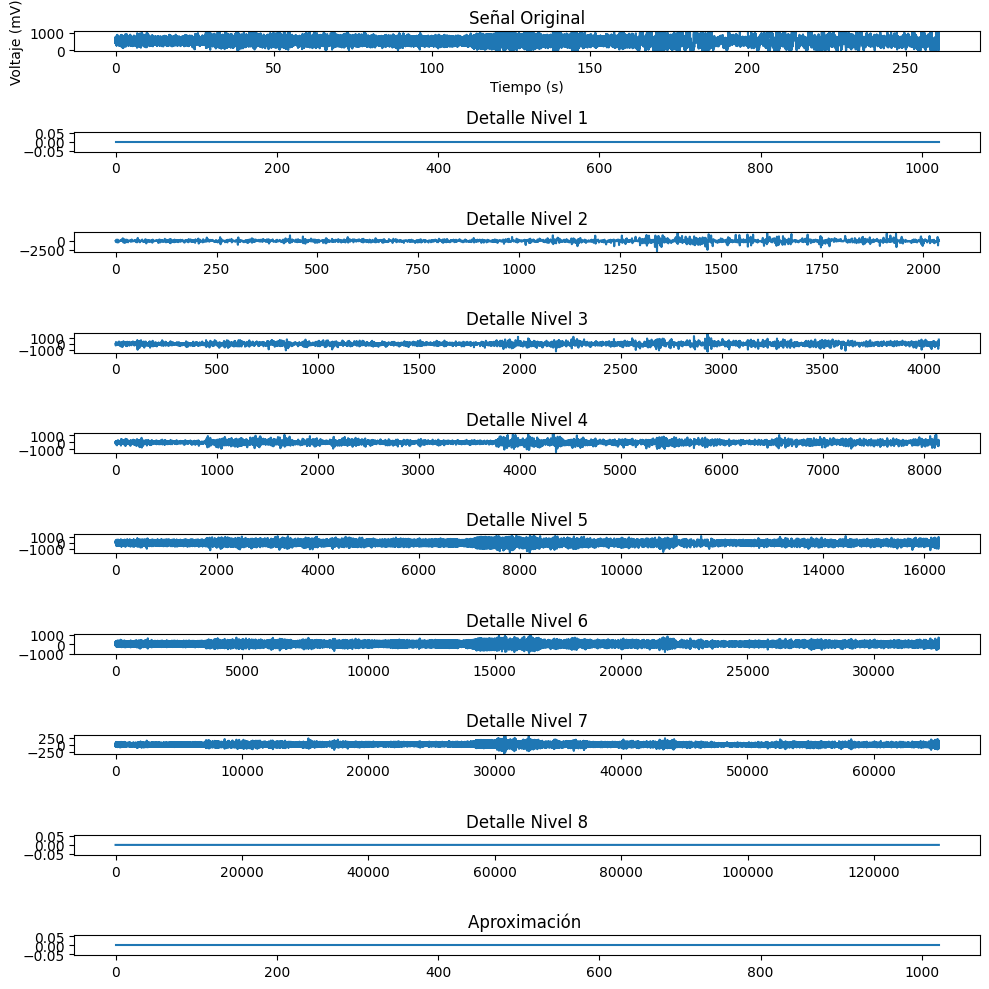

In [ ]:
niveles_eeg = 8
coeficientes_eeg = pywt.wavedec(signaleeg, 'sym3', level=niveles_eeg)
coeficientes_eeg[0] = 0 * coeficientes_eeg[0]
coeficientes_eeg[1] = 0 * coeficientes_eeg[1]
coeficientes_eeg[8] = 0 * coeficientes_eeg[8]

plt.figure(figsize=(10, 10))
plt.subplot(niveles_eeg + 2, 1, 1)
plt.plot(t_eeg,signaleeg)
plt.ylabel('Voltaje (mV)')
plt.xlabel('Tiempo (s)')
plt.title('Señal Original')

for i, detalle in enumerate(coeficientes_eeg[1:]):  # Empezar desde el segundo nivel
    plt.subplot(niveles_eeg + 2, 1, i + 2)
    plt.plot(detalle)
    plt.title(f'Detalle Nivel {i+1}')

plt.subplot(niveles_eeg + 2, 1, niveles_eeg + 2)
plt.plot(coeficientes_eeg[0])
plt.title(f'Aproximación ')
plt.tight_layout()
plt.show()

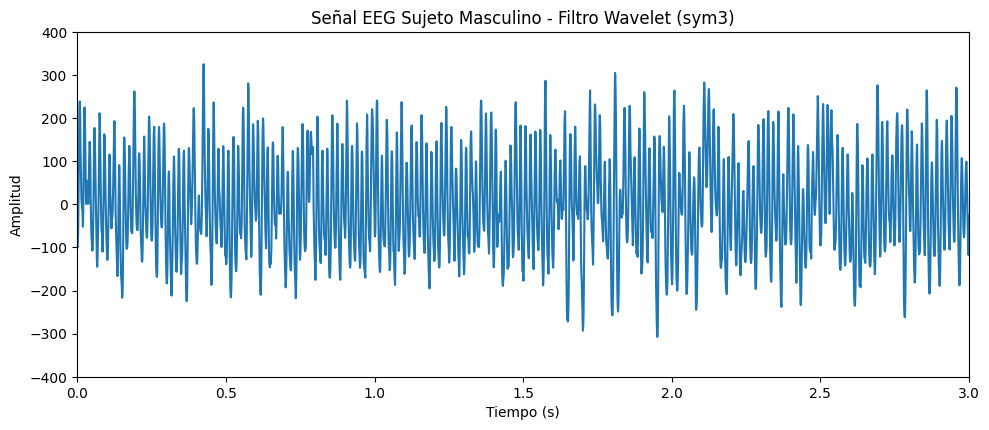

In [ ]:
umbral = 0.022

coeficientes_umbral_eeg = [pywt.threshold(c, umbral, mode='soft') for c in coeficientes_eeg]


senal_filtrada_eeg = pywt.waverec(coeficientes_umbral_eeg, 'sym3')

plt.figure(figsize=(10, 8))


plt.subplot(2, 1, 2)
plt.plot(t_eeg, senal_filtrada_eeg)
plt.xlim(0,3)
plt.ylim(-400,400)
plt.title('Señal EEG Sujeto Masculino - Filtro Wavelet (sym3)')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

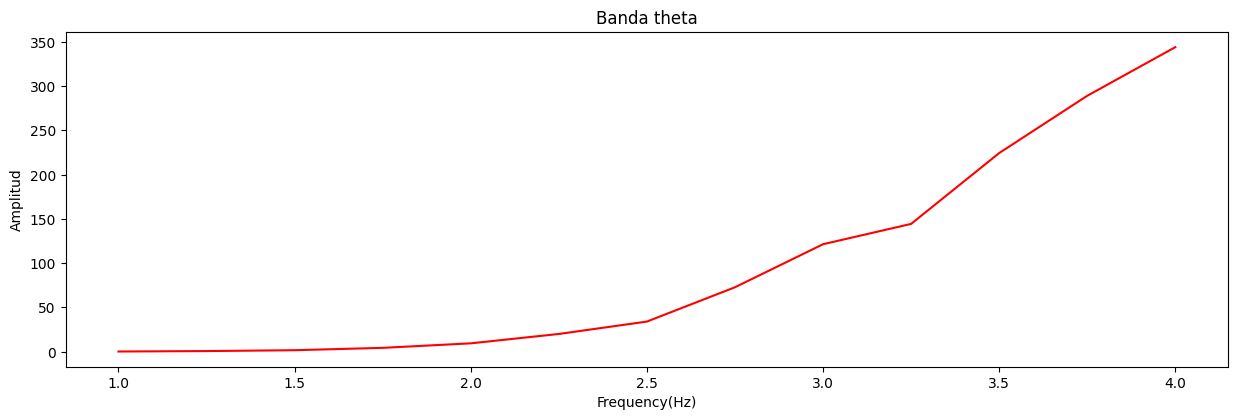

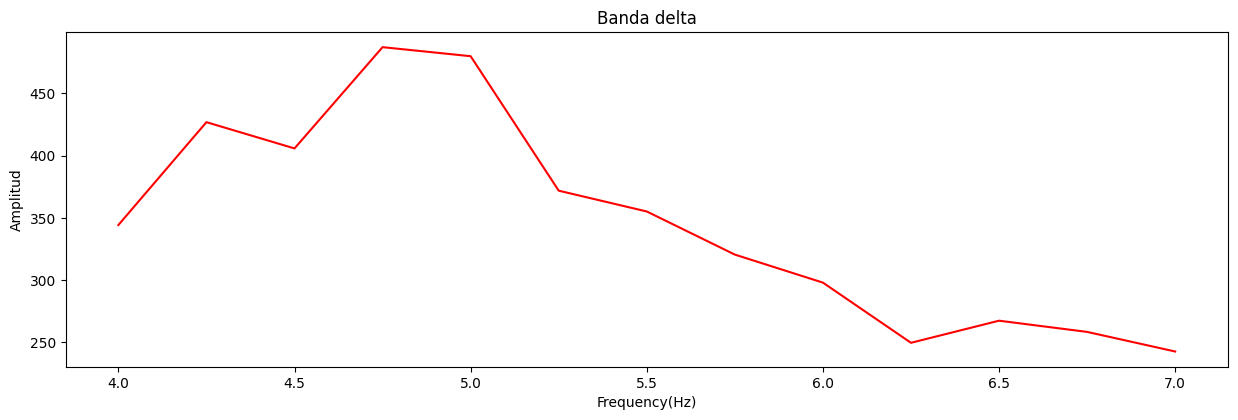

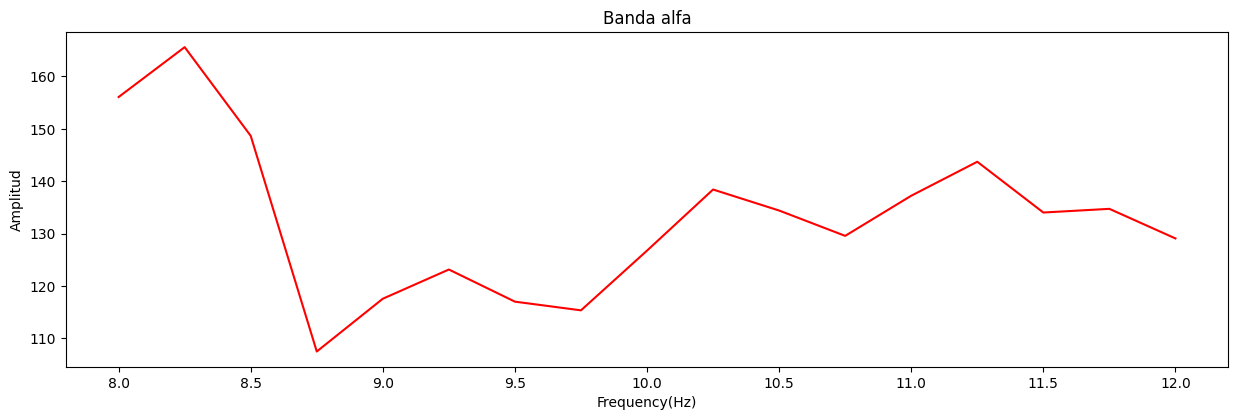

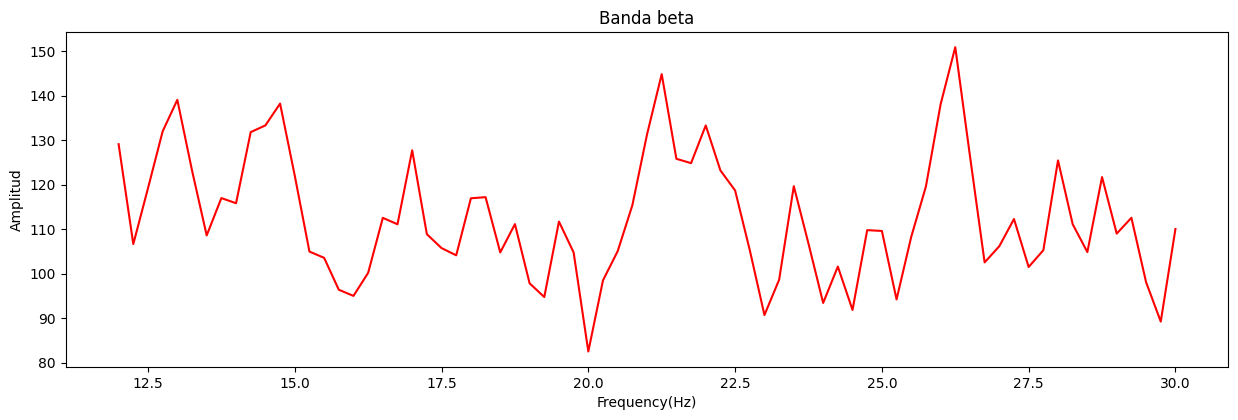

In [ ]:
#Time Windows for Welchs method - Delta band

sr=1000
win = 4 * sr # 4 seconds time windows.

#FFT with time windows using scipy.signal.welch
axis_x_1, axis_y_1 = welch(senal_filtrada_eeg, sr, nperseg=win)


freq_low = 1  #lower limit for alpha band
freq_high = 4 #Upper limit for alpha band

Signal_1 = np.logical_and(axis_x_1 >= freq_low, axis_x_1 <= freq_high)


fig2 = plt.figure(figsize=(15,20))

plt.subplot(4, 1, 1); plt.plot(axis_x_1[Signal_1], axis_y_1[Signal_1], "r"); plt.xlabel("Frequency(Hz)"); plt.title("Banda delta");
plt.ylabel("Amplitud");

#Time Windows for Welchs method -  Theta band
sr=1000
win = 4 * sr # 4 seconds time windows.

#FFT with time windows using scipy.signal.welch
axis_x_1, axis_y_1 = welch(senal_filtrada_eeg, sr, nperseg=win)


freq_low = 4 #lower limit for alpha band
freq_high = 7 #Upper limit for alpha band

Signal_1 = np.logical_and(axis_x_1 >= freq_low, axis_x_1 <= freq_high)


fig2 = plt.figure(figsize=(15,20))

plt.subplot(4, 1, 1); plt.plot(axis_x_1[Signal_1], axis_y_1[Signal_1], "r"); plt.xlabel("Frequency(Hz)"); plt.title("Banda theta");
plt.ylabel("Amplitud");

#Time Windows for Welchs method -  Alpha band
sr=1000
win = 4 * sr # 4 seconds time windows.

#FFT with time windows using scipy.signal.welch
axis_x_1, axis_y_1 = welch(senal_filtrada_eeg, sr, nperseg=win)


freq_low = 8 #lower limit for alpha band
freq_high = 12 #Upper limit for alpha band

Signal_1 = np.logical_and(axis_x_1 >= freq_low, axis_x_1 <= freq_high)


fig2 = plt.figure(figsize=(15,20))

plt.subplot(4, 1, 1); plt.plot(axis_x_1[Signal_1], axis_y_1[Signal_1], "r"); plt.xlabel("Frequency(Hz)"); plt.title("Banda alfa");
plt.ylabel("Amplitud");
#Time Windows for Welchs method -  Alpha band
sr=1000
win = 4 * sr # 4 seconds time windows.

#FFT with time windows using scipy.signal.welch
axis_x_1, axis_y_1 = welch(senal_filtrada_eeg, sr, nperseg=win)


freq_low = 12 #lower limit for alpha band
freq_high = 30 #Upper limit for alpha band

Signal_1 = np.logical_and(axis_x_1 >= freq_low, axis_x_1 <= freq_high)


fig2 = plt.figure(figsize=(15,20))

plt.subplot(4, 1, 1); plt.plot(axis_x_1[Signal_1], axis_y_1[Signal_1], "r"); plt.xlabel("Frequency(Hz)"); plt.title("Banda beta");
plt.ylabel("Amplitud");

In [ ]:
max_value = max(senal_filtrada_eeg)
min_value = min(senal_filtrada_eeg)
amplitude = max_value - min_value
mean = np.mean(senal_filtrada_eeg)
median_val = np.median(senal_filtrada_eeg)
std_val = np.std(senal_filtrada_eeg)
variance = np.var(senal_filtrada_eeg)

print(f'El valor máximo de la señal es: {max_value}')
print(f'El valor mínimo de la señal es: {min_value}')
print(f'La amplitud de la señal es: {amplitude}')
print(f'La media de la señal es: {mean}')
print(f'El valor medio de la señal es: {median_val}')
print(f'La desviación estandar de la señal es: {std_val}')
print(f'La varianza de la señal es: {variance}')

El valor máximo de la señal es: 618.3710897934338
El valor mínimo de la señal es: -889.2979972097079
La amplitud de la señal es: 1507.6690870031416
La media de la señal es: -0.0008470997696362168
El valor medio de la señal es: -6.269405535316403
La desviación estandar de la señal es: 142.31005613050027
La varianza de la señal es: 20252.15207586614
